# Monthly Milk Production

In [36]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from pandas.tseries.offsets import DateOffset

# Get the data

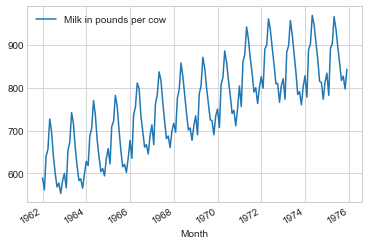

In [37]:
df = pd.read_csv('MonthlyMilkProduction.csv')
df.columns = ['Month','Milk in pounds per cow']
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month',inplace=True)
df.plot()

# Decomposition

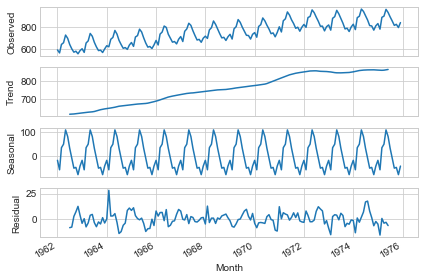

In [38]:
decomposition = seasonal_decompose(df['Milk in pounds per cow'], freq=12)  
fig = plt.figure()  
fig = decomposition.plot()

# Testing for stationarity

In [39]:
result = adfuller(df['Milk in pounds per cow'])
print(result[1]) #P-value < 0.05 then stationary

0.627426708603


First Difference

0.0300680040018


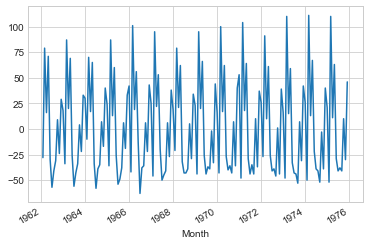

In [40]:
df['Milk First Difference'] = df['Milk in pounds per cow'] - df['Milk in pounds per cow'].shift(1)
result = adfuller(df['Milk First Difference'].dropna())
print(result[1]) #P-value < 0.05 then stationary
df['Milk First Difference'].plot()

Seasonal Difference

0.160798805277


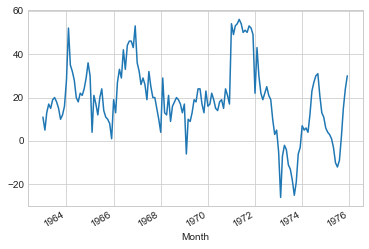

In [41]:
df['Seasonal Difference'] = df['Milk in pounds per cow'] - df['Milk in pounds per cow'].shift(12)
result = adfuller(df['Seasonal Difference'].dropna())
print(result[1]) #P-value < 0.05 then stationary
df['Seasonal Difference'].plot()

Seasonal First Difference

1.86542343188e-05


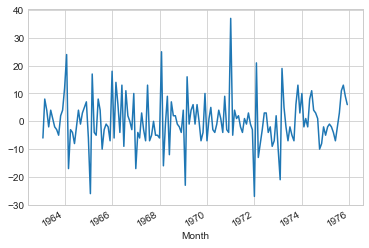

In [42]:
df['Seasonal First Difference'] = df['Milk First Difference'] - df['Milk First Difference'].shift(12)
result = adfuller(df['Seasonal First Difference'].dropna())
print(result[1]) #P-value < 0.05 then stationary
df['Seasonal First Difference'].plot()

# ACF and PACF

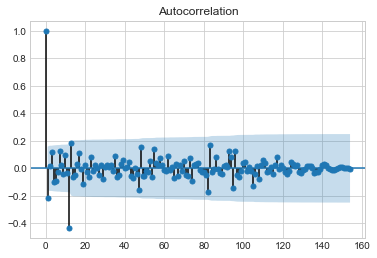

In [43]:
fig_seasonal_first = plot_acf(df["Seasonal First Difference"].dropna())

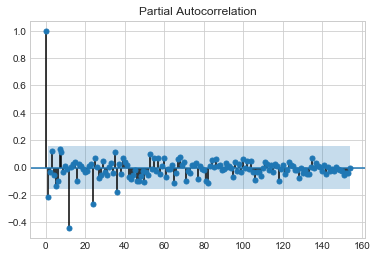

In [44]:
fig_seasonal_first = plot_pacf(df["Seasonal First Difference"].dropna())

# Seasonal ARIMA model

In [45]:
model = sm.tsa.statespace.SARIMAX(df['Milk in pounds per cow'],order=(0,1,0), seasonal_order=(1,1,1,12))
results = model.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:             Milk in pounds per cow   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -534.065
Date:                            Sun, 13 May 2018   AIC                           1074.131
Time:                                    06:54:28   BIC                           1083.503
Sample:                                01-01-1962   HQIC                          1077.934
                                     - 12-01-1975                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.5860      0.102   

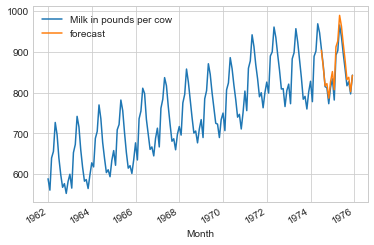

In [46]:
df['forecast'] = results.predict(start = 150, end= 168, dynamic= True)  
df[['Milk in pounds per cow','forecast']].plot()

# Forecasting

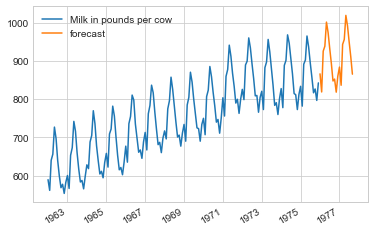

In [47]:
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,24) ]
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_df = pd.concat([df,future_dates_df])
future_df['forecast'] = results.predict(start = 168, end = 188, dynamic= True)  
future_df[['Milk in pounds per cow', 'forecast']].plot() 